## Quantum Phase Estimation (QPS)

![image.png](https://raw.githubusercontent.com/Qiskit/textbook/aebdd2bc86ddb7a79dd8441d52c839d312ffafbb/notebooks/ch-algorithms/images/qpe_tex_qz.png)

- Akwgnolegement

    This module's circuit was extracted from a [Qiskit Repositorie.](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/quantum-phase-estimation.ipynb)


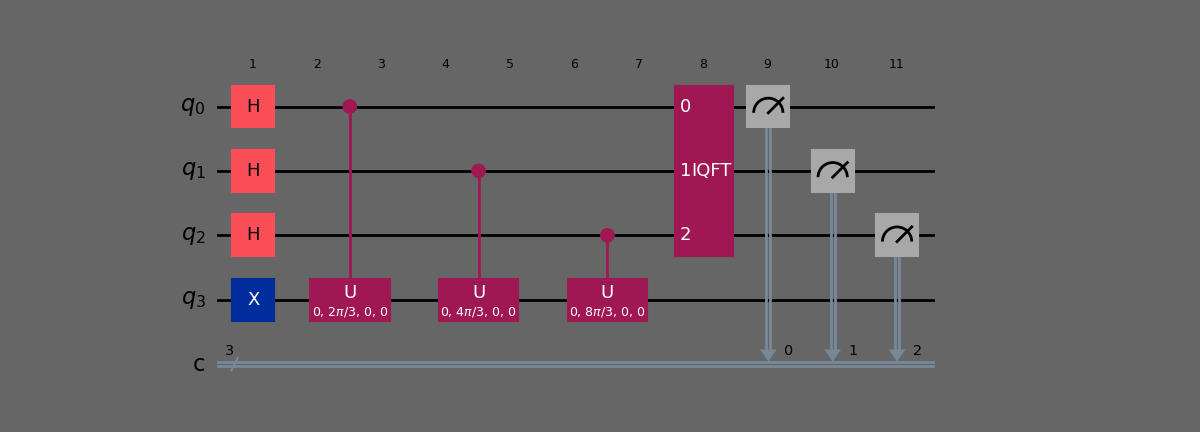

In [1]:

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math
from qiskit.circuit.library import QFT

# importing the style for the circuit from local *.py file.
import sys
sys.path.append('C:/Users/Gustavo_Porcilio/ALGORITHMS/Doc_help')
from circuit_style import style

qpe = QuantumCircuit(4, 3)

# H-Gates to control qubits:
for qubit in range(3):
    qpe.h(qubit)

# Eigenstate |psi>:
qpe.x(3)

# Controlled-U angles (theta) for qubits in descending order:
angle = 2*math.pi/3

for control_qubit in range(3):
    qpe.cu(0, angle, 0, 0, control_qubit, 3);
    angle *= 2

qpe.append(QFT(3, inverse=True), range(3))

for n in range(3):
    qpe.measure(n,n)

qpe.draw(style=style, output="mpl")

SamplerResult(quasi_dists=[{0: 0.0205078125, 1: 0.0302734375, 2: 0.17626953125, 3: 0.68212890625, 4: 0.044189453125, 5: 0.0205078125, 6: 0.014404296875, 7: 0.01171875}], metadata=[{'shots': 4096}])
----------------------------------------------------------------
Total Shots 4096 , Counts >>> {0: 84, 1: 124, 2: 722, 3: 2794, 4: 181, 5: 84, 6: 59, 7: 48}
None
{0: 0.0205078125, 1: 0.0302734375, 2: 0.17626953125, 3: 0.68212890625, 4: 0.044189453125, 5: 0.0205078125, 6: 0.014404296875, 7: 0.01171875}
----------------------------------------------------------------
Binary Counts >>> {'000': 0.0205078125, '001': 0.0302734375, '010': 0.17626953125, '011': 0.68212890625, '100': 0.044189453125, '101': 0.0205078125, '110': 0.014404296875, '111': 0.01171875}


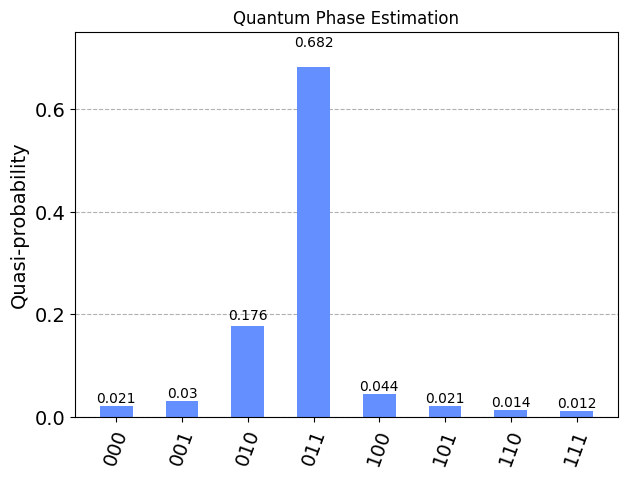

In [2]:
# Run a simulation with Sampler
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler

shots = 4096

# ***With a short line of code***
# Sampler().run(qc).result().quasi_dists[0]
sampler = Sampler()
job = sampler.run(qpe, shots=shots)

# Get the result
result = job.result()
print(result)
print("----------------------------------------------------------------")
probabilities = result.quasi_dists[0]


# Calculate the counts for each result
counts = {key: round(value * shots) for key, value in probabilities.items()}

print(print("Total Shots", sum(counts.values()), ", Counts >>>", counts))


# Calculate the counts for each result
counts = {key: round(value * shots) for key, value in probabilities.items()}

print(probabilities)
print("----------------------------------------------------------------")

# Convert keys from decimal to binary
binary_key_counts = {format(key, '03b'): value for key, value in probabilities.items()}

print("Binary Counts >>>", binary_key_counts)

# Plot the results
plot_histogram(binary_key_counts, title="Quantum Phase Estimation")

The two most likely measurements are now `010` (decimal 2) and `011` (decimal 3). Measuring these results would tell us $\theta$ is:

$$
\theta = \frac{2}{2^3} = 0.25,\;\text{  or  }\;\; \theta = \frac{3}{2^3} = 0.375
$$

These two results would tell us that $\theta = 0.25$ (off by 25%) and $\theta = 0.375$ (off by 13%) respectively. The true value of $\theta$ = $\frac{1}{3}$ = 0,33333... lies between the values we can get from our counting bits, and this gives us uncertainty and imprecision.

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
from dotenv import load_dotenv
import os

# Load the .env file
load_dotenv()

# Save the API token
MY_API_TOKEN = os.getenv("API_TOKEN")
QiskitRuntimeService.save_account(channel="ibm_quantum", token=MY_API_TOKEN, overwrite=True)

service = QiskitRuntimeService()

# Get the provider
backend = service.least_busy(simulator=False)
backend
backend.status()

In [4]:
backend.num_qubits

127

In [5]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(qpe)

from qiskit_ibm_runtime import SamplerV2 as Sampler
 
sampler = Sampler(backend=backend)

In [6]:
# Run the circuit on real hardware.
# Commented out to avoid running on real hardware twice.

# job = sampler.run([isa_circuit])

In [ ]:
isa_circuit.draw(style=style, output="mpl") # Too large to plot

In [8]:
# Call the job from IBM Quantum Runtime
job = service.job("cs7tfzqtg3bg008zp7n0")

In [9]:
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cs7tfzqtg3bg008zp7n0
>>> Job Status: JobStatus.DONE


Print all attributes of the data >>>  ['__abstractmethods__', '__and__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__invert__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__non_callable_proto_members__', '__or__', '__parameters__', '__protocol_attrs__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '__xor__', '_abc_impl', '_array', '_bytes_to_bitstring', '_bytes_to_int', '_get_counts', '_is_protocol', '_is_runtime_protocol', '_num_bits', '_prepare_broadcastable', '_shape', 'array', 'bitcount', 'from_bool_array', 'from_counts', 'from_samples', 'get_bitstrings', 'get_counts', 'get_int_counts', 'ndim', 'num_bits', 'num_shots', 'reshape', 'shape', 'size']
--------------------------------------------------------

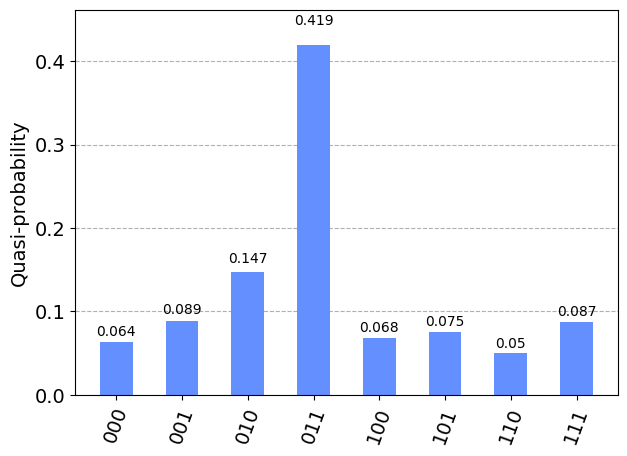

In [10]:
# Get the result
result = job.result()

# Get results for the first (and only) PUB
pub_result = result[0]

# Get the measurement data
data = pub_result.data.c
print("Print all attributes of the data >>> ", dir(data)) # Print all attributes of the data.
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")


# Output:
['__abstractmethods__', '__and__', '__annotations__', '__class__', '__class_getitem__', 
 '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', 
 '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', 
 '__invert__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__non_callable_proto_members__', 
 '__or__', '__parameters__', '__protocol_attrs__', '__reduce__', '__reduce_ex__', '__repr__', 
 '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '__xor__', 
 '_abc_impl', '_array', '_bytes_to_bitstring', '_bytes_to_int', '_get_counts', '_is_protocol', 
 '_is_runtime_protocol', '_num_bits', '_prepare_broadcastable', '_shape', 'array', 'bitcount', 
 'from_bool_array', 'from_counts', 'from_samples', 'get_bitstrings', 'get_counts', 'get_int_counts', 
 'ndim', 'num_bits', 'num_shots', 'reshape', 'shape', 'size']


# In the output, we see that the data object has a method called get_counts().
counts = data.get_counts()

# Print all attributes of the data
print("Counts: ", counts)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")

# Plot the results
plot_histogram(counts) # This plot will show the results of the circuit execution.

# Calculate the total number of shots
total_shots = sum(counts.values())
print("Total Shots in backend >>>", total_shots)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")

# print(counts.items())

# Calculate the probabilities
probabilities = {bitstring: count / total_shots for bitstring, count in counts.items()}
print("Probabilities in every output >>>", probabilities)

# Plot the probabilities like in the previous example
plot_histogram(probabilities)

In [12]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.version.get_version_info()

'0.23.0'